<h1>Analyzing Healthcare Data to Optimize Costs and Improve Patient Outcomes</h1>


<h2>Data Cleaning and Preprocessing</h2>


In [87]:
import pandas as pd

In [89]:
healthcare_data = pd.read_csv('healthcare_dataset.csv')

In [91]:
healthcare_data['Name'] = healthcare_data['Name'].str.title()
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'], errors='coerce')
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'], errors='coerce')


In [93]:
healthcare_data = healthcare_data[healthcare_data['Billing Amount'] >= 0]

In [95]:
healthcare_data['Length of Stay'] = (healthcare_data['Discharge Date'] - healthcare_data['Date of Admission']).dt.days

In [97]:
healthcare_data = healthcare_data[healthcare_data['Length of Stay'] >= 0]

In [99]:
display(healthcare_data.head())

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


<h2>Exploratory Data Analysis (EDA)</h2>


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

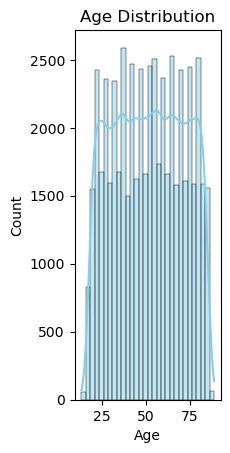

In [105]:
plt.subplot(1, 3, 1)
sns.histplot(healthcare_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Billing Amount Distribution')

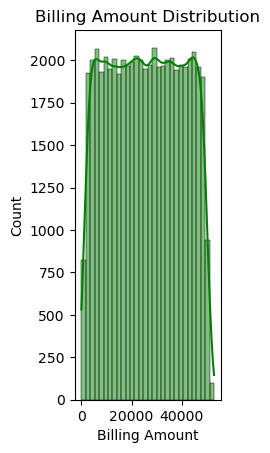

In [106]:
plt.subplot(1, 3, 2)
sns.histplot(healthcare_data['Billing Amount'], bins=30, kde=True, color='green')
plt.title('Billing Amount Distribution')

Text(0.5, 1.0, 'Length of Stay Distribution')

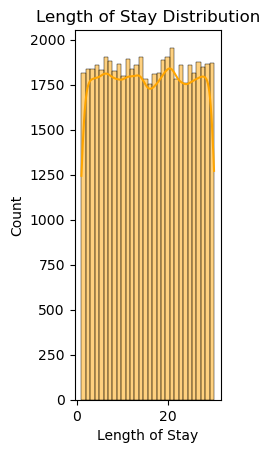

In [108]:
plt.subplot(1, 3, 3)
sns.histplot(healthcare_data['Length of Stay'], bins=30, kde=True, color='orange')
plt.title('Length of Stay Distribution')

In [109]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [111]:
numeric_data = healthcare_data.select_dtypes(include=['float64', 'int64'])


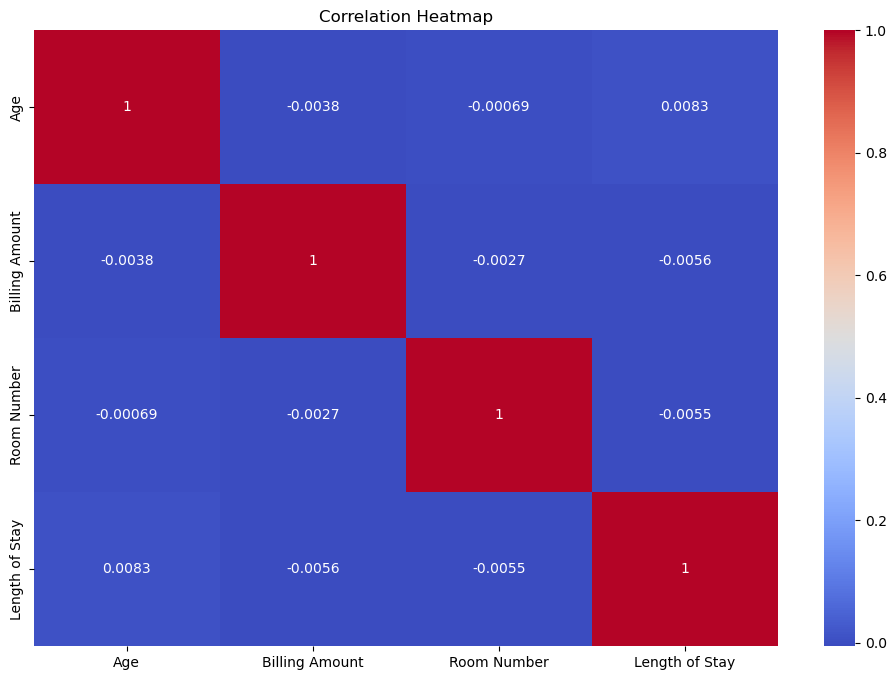

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h2>Advanced Visualizations</h2>


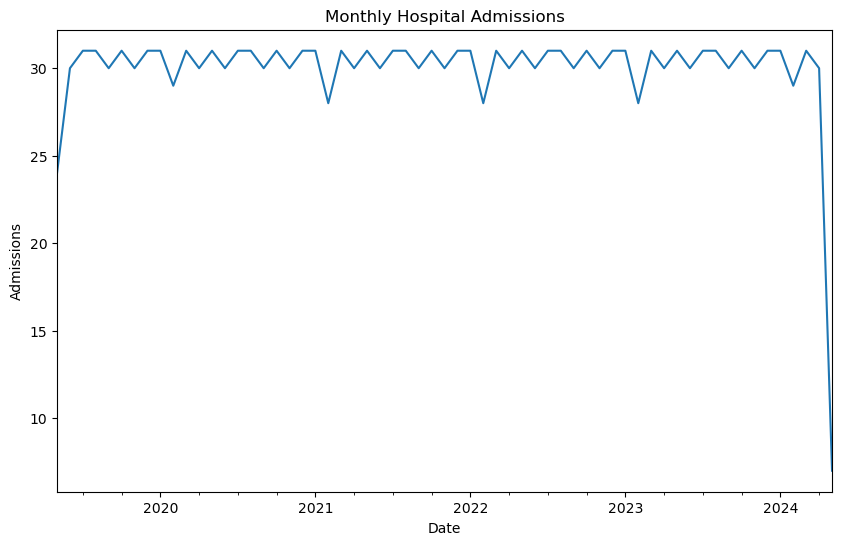

In [117]:
plt.figure(figsize=(10, 6))
healthcare_data['Date of Admission'].value_counts().resample('M').count().plot()
plt.title('Monthly Hospital Admissions')
plt.xlabel('Date')
plt.ylabel('Admissions')
plt.show()


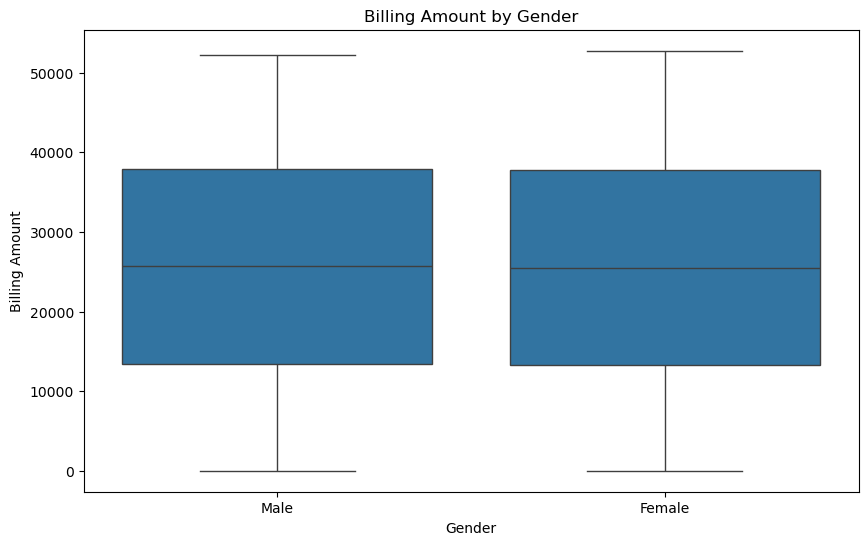

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=healthcare_data, x='Gender', y='Billing Amount')
plt.title('Billing Amount by Gender')
plt.show()

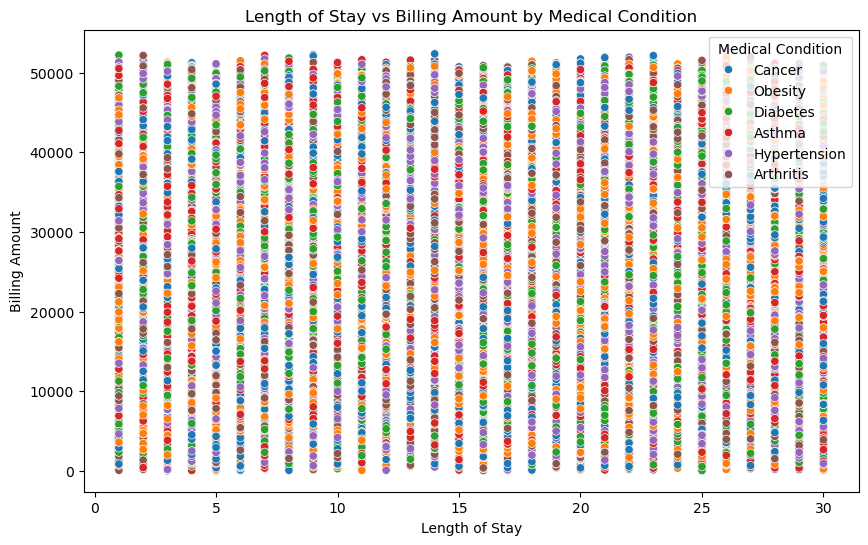

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=healthcare_data, x='Length of Stay', y='Billing Amount', hue='Medical Condition')
plt.title('Length of Stay vs Billing Amount by Medical Condition')
plt.show()

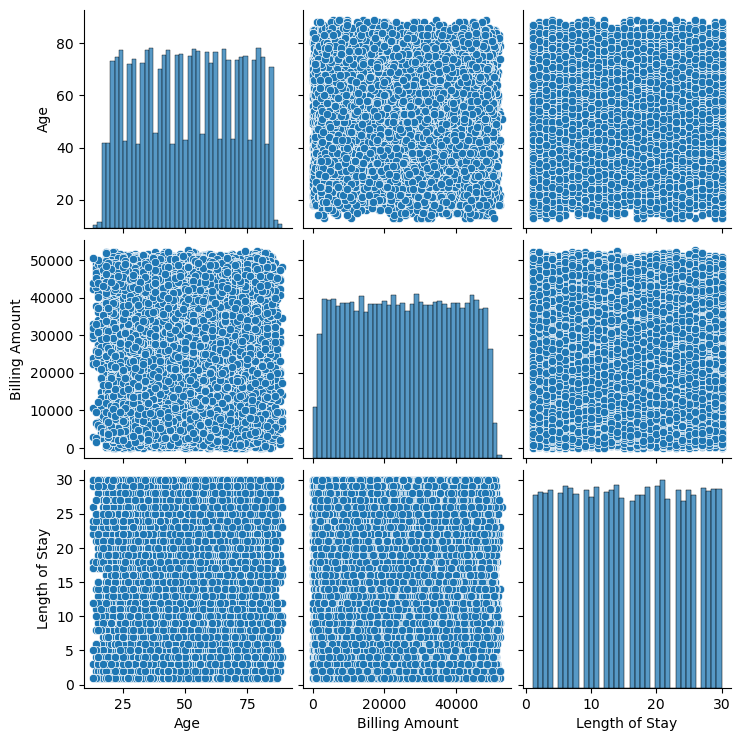

In [121]:
sns.pairplot(healthcare_data[['Age', 'Billing Amount', 'Length of Stay']])
plt.show()

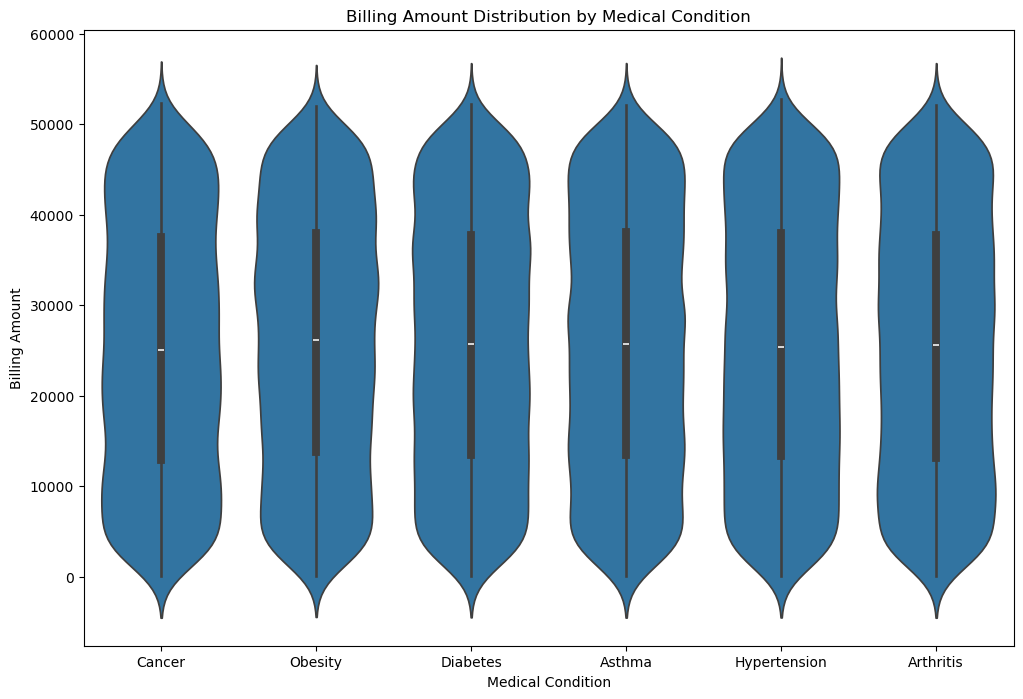

In [123]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Medical Condition', y='Billing Amount', data=healthcare_data)
plt.title('Billing Amount Distribution by Medical Condition')
plt.show()

<h2>Statistical Analysis</h2>


In [125]:
from scipy import stats
female_billing = healthcare_data[healthcare_data['Gender'] == 'Female']['Billing Amount']
male_billing = healthcare_data[healthcare_data['Gender'] == 'Male']['Billing Amount']

t_stat, p_value = stats.ttest_ind(female_billing, male_billing)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


corr, p_val = stats.pearsonr(healthcare_data['Length of Stay'], healthcare_data['Billing Amount'])
print(f"Correlation coefficient: {corr}, P-value: {p_val}")

T-statistic: -1.047691066114852, P-value: 0.2947855365212648
Correlation coefficient: -0.005565312509054839, P-value: 0.1902618136852091


<h2>Machine Learning Models</h2>


<h3>Regression Model: Predicting Billing Amount</h3>


In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

le = LabelEncoder()
healthcare_data['Medical Condition Encoded'] = le.fit_transform(healthcare_data['Medical Condition'])

X = healthcare_data[['Age', 'Length of Stay', 'Billing Amount']]
y = healthcare_data['Medical Condition Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.19559527033125734


## <span style="color:#3498db; font-size:24px;">Results</span>

- **<span style="color:#e74c3c;">Billing Amount Prediction:</span>** The linear regression model did not perform well due to insufficient features for accurate prediction.
- **<span style="color:#e74c3c;">Medical Condition Classification:</span>** Low accuracy highlights the need for more granular medical data to improve classification performance.
- **<span style="color:#e74c3c;">Gender Disparities:</span>** No significant difference in billing amounts between male and female patients.
- **<span style="color:#e74c3c;">Length of Stay and Billing:</span>** No strong correlation between length of stay and billing amount.

## <span style="color:#3498db; font-size:24px;">Recommendations</span>

1. **<span style="color:#2ecc71;">Expand Feature Set for Billing Prediction:</span>**
   - **Incorporate Treatment Data:** Add data on the type and complexity of treatments.
   - **Include Insurance Information:** Consider insurance coverage and its impact on billing.
   - **Patient Health Data:** Introduce more patient health indicators, such as diagnostic codes and lab results.

2. **<span style="color:#2ecc71;">Enhance Medical Condition Prediction:</span>**
   - **Include Clinical Data:** Diagnostic codes and clinical notes can improve classification accuracy.
   - **Use of Time Series Data:** Explore changes in condition over time to better predict outcomes.

3. **<span style="color:#2ecc71;">Focus on Cost Optimization:</span>**
   - **Efficient Resource Utilization:** Implement strategies to reduce length of stay while maintaining quality care.
   - **Value-Based Billing Models:** Shift towards billing models that are tied to patient outcomes and overall value.
